# 母平均の仮説検定と区間推定

黒木玄

2019-09-14

正規分布モデルとt分布を用いた母集団平均の両側検定と区間推定について解説する.

$
\newcommand\eps{\varepsilon}
\newcommand\ds{\displaystyle}
\newcommand\Z{{\mathbb Z}}
\newcommand\R{{\mathbb R}}
\newcommand\C{{\mathbb C}}
\newcommand\QED{\text{□}}
\newcommand\root{\sqrt}
\newcommand\bra{\langle}
\newcommand\ket{\rangle}
\newcommand\d{\partial}
\newcommand\sech{\operatorname{sech}}
\newcommand\cosec{\operatorname{cosec}}
\newcommand\sign{\operatorname{sign}}
\newcommand\sinc{\operatorname{sinc}}
\newcommand\real{\operatorname{Re}}
\newcommand\imag{\operatorname{Im}}
\newcommand\Li{\operatorname{Li}}
\newcommand\PROD{\mathop{\coprod\kern-1.35em\prod}}
$

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#母平均の仮説検定" data-toc-modified-id="母平均の仮説検定-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>母平均の仮説検定</a></span><ul class="toc-item"><li><span><a href="#設定" data-toc-modified-id="設定-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>設定</a></span></li><li><span><a href="#正規分布モデルによる母集団平均に関する両側検定" data-toc-modified-id="正規分布モデルによる母集団平均に関する両側検定-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>正規分布モデルによる母集団平均に関する両側検定</a></span><ul class="toc-item"><li><span><a href="#正規分布モデルによる母集団平均に関する両側検定の設定" data-toc-modified-id="正規分布モデルによる母集団平均に関する両側検定の設定-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>正規分布モデルによる母集団平均に関する両側検定の設定</a></span></li><li><span><a href="#正規分布モデルによる母集団平均に関する両側検定の作成" data-toc-modified-id="正規分布モデルによる母集団平均に関する両側検定の作成-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>正規分布モデルによる母集団平均に関する両側検定の作成</a></span></li></ul></li></ul></li><li><span><a href="#母平均の信頼区間" data-toc-modified-id="母平均の信頼区間-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>母平均の信頼区間</a></span></li><li><span><a href="#仮説検定や区間推定がモデルに強く依存していることの重要性" data-toc-modified-id="仮説検定や区間推定がモデルに強く依存していることの重要性-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>仮説検定や区間推定がモデルに強く依存していることの重要性</a></span><ul class="toc-item"><li><span><a href="#全体の平均値に大きな影響を与える小集団が母集団に含まれている場合" data-toc-modified-id="全体の平均値に大きな影響を与える小集団が母集団に含まれている場合-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>全体の平均値に大きな影響を与える小集団が母集団に含まれている場合</a></span></li><li><span><a href="#それではどうすればよいのか？" data-toc-modified-id="それではどうすればよいのか？-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>それではどうすればよいのか？</a></span></li></ul></li><li><span><a href="#他の計算例" data-toc-modified-id="他の計算例-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>他の計算例</a></span></li></ul></div>

In [1]:
using Base64
displayfile(mime, file; tag="img") = open(file) do f
    display("text/html", """<$tag src="data:$mime;base64,$(base64encode(f))">""")
end
using Distributions
using Plots
pyplot(size=(400, 250), titlefontsize=10, fmt=:svg)

Plots.PyPlotBackend()

## 母平均の仮説検定

### 設定

以下では気楽に, 確率密度函数を確率分布もしくは分布と呼ぶことがある.  

以下において, 母集団分布を $q(x)$ と書く. 母集団分布は未知ではあるが任意の分布であると考える. ただし, 母集団分布 $q(x)$ は平均と有限の分散を持つと仮定する(現実にはこの仮定が適切であるかどうかはわからないのだが, 簡単のためこのように仮定しておく). 母集団分布 $q(x)$ の平均と分散をそれぞれ $\mu_0$, $\sigma_0^2$ と書くことにする:

$$
\mu_0 = \int x\,q(x)\,dx, \quad \sigma_0^2 = \int (x-\mu_0)^2\,q(x)\,dx.
$$

ここで $\int$ は実数全体での積分 $\int_\R$ を意味するものとする.  以下でも同様とする.

母集団からの無作為抽出で得たサイズ $n$ のサンプルを $X_1,X_2,\ldots,X_n$ と書く.  

数学的に $X_1,X_2,\ldots,X_n$ は各々が確率分布 $q(x)$ に従う独立同分布確率変数列であるとする.  (同じサイコロを $n$ 回ふって出た目の列の一般化が $X_1,X_2,\ldots,X_n$ だと思ってよい.)

我々の目標はサンプル $X_1,X_2,\ldots,X_n$ のみから, 母集団平均 $\mu_0$ について何がしかの推測を行うことである.

### 正規分布モデルによる母集団平均に関する両側検定

正規分布モデルを用いて, 母集団平均に関する両側検定の手続きを作ろう.

#### 正規分布モデルによる母集団平均に関する両側検定の設定

$p(x|\mu,\sigma^2)$ は平均 $\mu$, 分散 $\sigma^2$ の正規分布(の確率密度函数)であるとする:

$$
p(x|\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-(x-\mu)^2/(2\sigma^2)}.
$$

そして, 仮説 $M(\mu)$ を次のように定義する:

* $M(\mu)$ ＝「ある $\sigma^2 > 0$ が存在して, 母集団分布 $q(x)$ は平均 $\mu$, 分散 $\sigma^2$ の正規分布 $p(x|\mu,\sigma)$ に等しい.」

前節において, 母集団分布 $q(x)$ は平均と有限な分散を持つ任意の分布だと仮定していたので, 仮設 $M(\mu)$ が正しい可能性はほぼないと考えてよい.  しかし, 現実の統計分析ではこのような「正しい可能性がほぼないと考えられる仮説」の使用が近似的な推論として十分に実用的な場合が少なくない.

仮に仮説 $M(\mu)$ が正しいならば, 母集団分布は $p(x|\mu,\sigma^2)$ の形をしているので, そのサンプル $X_1,X_2,\ldots,X_n$ について, $T$ を次のように定義すると, $T$ は自由度 $n-1$ のt分布に従うことを証明できる(ここではその結果のみが重要なのでその計算は省略する):

$$
\begin{aligned}
%&
\overline{X} = \frac{1}{n}\sum_{k=1}^n X_k, 
%\\ &
\quad
U^2 = \frac{1}{n-1}\sum_{k=1}^n (X_k - \overline{X})^2,
%\\ &
\quad
T = \frac{\overline{X} - \mu}{\sqrt{U^2/n}}.
\end{aligned}
$$

$\overline{X}$ は**サンプル平均**と呼ばれ, $U^2$ は**不偏分散**と呼ばれる. $\overline{X}, U^2$ は仮説 $M(\mu)$ とは無関係にサンプルのみから定義されていることに注意せよ. それぞれ, 仮説 $M(\mu)$ と無関係に, サンプル平均 $\overline{X}$ は母集団平均の不偏一致推定量になり, 不偏分散 $U^2$ は母集団分散の不偏一致推定量になる.

$T$ を**t 統計量**と呼ぶことにしよう.  t 統計量 $T$ も仮説 $M(\mu)$ とは無関係に $\mu$ が指定されればサンプルのみを使って定義される. 

自由度 $\nu=n-1$ の t 分布の密度函数 $f_\nu(t)$ は次のように書ける:

$$
f_\nu(t) = \frac{1}{c_\nu} \left(1+\frac{t^2}{\nu}\right)^{-(\nu+1)/2}, \quad
c_\nu = \sqrt{\nu}\,B(1/2, (\nu+1)/2) = \frac{\sqrt{\pi\nu}\,\Gamma(\nu/2)}{\Gamma((\nu+1)/2)}.
$$

$\nu\to\infty$ で自由度 $\nu$ のt分布 $f_\nu(t)$ は標準正規分布 $p(t|0,1^2)=e^{-t^2/2}\big/\sqrt{2\pi}$ に収束する.  自由度 $\nu$ が小さい場合に $t$ 分布の裾は太めになる.

この手の正規分布に関係する公式の導出はガンマ函数やベータ函数の計算に慣れればできるようになる.  個人的な意見では, 高校で三角函数, 指数函数, 対数函数, 逆三角函数などを習った後の次に習うべき特殊積分と特殊函数は[Gauss積分とガンマ函数とベータ函数](https://genkuroki.github.io/documents/Calculus/10%20Gauss%2C%20Gamma%2C%20Beta.pdf)だと思う.

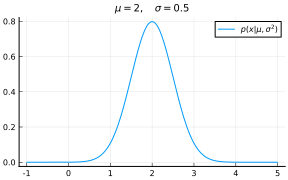

In [2]:
# 正規分布の確率密度函数

μ, σ = 2, 0.5
x = range(-1, 5, length=400)
plot(x, pdf.(Normal(μ, σ), x); label="\$p(x|\\mu, \\sigma^2)\$", title="\$\\mu = $μ, \\quad \\sigma = $σ\$")

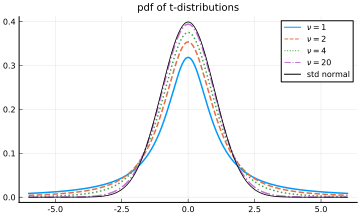

In [3]:
# t 分布の確率密度函数

x = range(-6, 6, length=400)
P = plot(; title="pdf of t-distributions", size=(500, 300))
for ν in [1, 2, 4, 20]
    plot!(x, pdf.(TDist(ν), x); label="\$\\nu = $ν\$", ls=:auto, lw=1.5)
end
plot!(x, pdf.(Normal(), x); label="std normal", color=:black, lw=0.8)
P

#### 正規分布モデルによる母集団平均に関する両側検定の作成

平均 $\mu$ の正規分布モデルの仮説 $M(\mu)$ の仮定のもとで, サンプル $X_1,X_2,\ldots,X_n$ の偏りの大きさをt統計量の絶対値 $|T|$ の大きさとして定義し, 仮説 $M(\mu)$ のもとで別のサンプルの偏りの大きさがサンプル $X_1,X_2,\ldots,X_n$ の偏りの大きさ以上になる確率を **p値 (p-value)** と呼ぶことにする. $p$ 値は次のように表わされる:

$$
\text{p-value} = \int_{|t|\geqq |T|} f_{n-1}(t)\,dt.
$$

と表わされる. コンピューター上にt分布が実装されていればこれは簡単に計算できる.

p値が非常に小さな値になるということは, 仮に仮説 $M(\mu)$ が正しいとしたら, 母集団からサンプル $X_1,X_2,\ldots,X_n$ が無作為抽出されることが非常に珍しいことを意味している.  だから, 母集団分布に関する仮説 $M(\mu)$ は疑わしいと判断することができる.

前もって決めておいた十分に小さな値 $\alpha > 0$ について, p値が $\alpha$ 未満になったので「仮説 $M(\mu)$ は正しくないだろう」と判断することを, 「仮説 $M(\mu)$ は有意水準 $\alpha$ で **棄却(reject)** された」という. p値が $\alpha$ 以上ならば仮説 $M(\mu)$ は棄却されないものとする.

このような手続きを**仮説検定**と呼ぶ.

**警告:** p値は仮説 $M(\mu)$ で採用した確率モデル(今の場合は正規分布モデル)の内側で計算された確率であり, 現実世界における確率ではない. p値は数学的な仮想世界における非現実的な確率の値である.

**補足:** より一般にp値は「母集団分布に関する確率モデル $M$ の仮定のもとで, すでに得られているサイズ $n$ のサンプルの偏りの大きさ以上の偏りが別のサイズ $n$ のサンプルで生じる確率」として定義される.  p値は確率モデル $M$ 内部の仮想世界における非現実的な確率であることに注意せよ.

**警告:** 仮説 $M(\mu)$ が棄却されなかったとしても, 仮説 $M(\mu)$ が正しいもしくは近似的に正しいということにはならないことに注意せよ.  仮説検定の手続きでは仮説を棄却することはできても, 仮説が正しいという判断をすることは不可能である.

**警告:** 上の仮説検定で棄却可能なのは「母集団平均が $\mu$ である」という弱い仮説ではなく、「母集団分布が平均 $\mu$ の正規分布になっている」という強い仮説 $M(\mu)$ である.  前者の弱い仮説を棄却可能にしたければ, 正規分布モデルの母集団分布への適用の妥当性を別の議論で正当化しておく必要がある.  この点は通常の統計学入門書では十分に説明されていないので注意が必要である.

**警告:** 母集団分布が正規分布であるという仮説に関する検定も開発されているが, その仮説で「母集団分布は正規分布である」という仮説が棄却されなくても, 母集団分布が正規分布であることが正しいことにはならないことに注意せよ. 結局のところ, 正規分布モデルの適用の妥当性の判断には別の議論が必要になる.

**計算例:** $T$ 統計量とp値を計算する函数は以下のように作れる.  母集団分布が平均 $\mu_0$, 分散 $\sigma_0^2$ の正規分布のとき, そのサイズ $n$ のサンプルの仮説 $M(\mu_0)$ のもとでのp値が $\alpha=0.05$ 未満になる確率は $\alpha=0.05$ になる. 

In [4]:
T_statistic(μ, X) = (mean(X) - μ)/√(var(X)/length(X))
p_value(μ, X) = 2ccdf(TDist(length(X)-1), abs(T_statistic(μ, X)))

α = 0.05
μ₀, σ₀ = 2.0, 0.5
n = 10
L = 10^5
X = rand(Normal(μ₀, σ₀), n, L)
count(p_value(μ₀, @view X[:, j]) < α for j in 1:size(X,2))/L

0.04819

## 母平均の信頼区間

$0 < \alpha < 1$ であると仮定する.

サンプル $X_1,X_2,\ldots,X_n$ に関する正規分布モデルに基いた信頼係数 $1-\alpha$ の母集団平均に関する信頼区間 $\mathrm{CI}$ を「仮説 $M(\mu)$ が有意水準 $\alpha$ で棄却されない $\mu$ の範囲」と定義する.  この定義は多くの教科書と見掛け上異なるが, 結果的に同じであることがわかる.  多くの統計学入門書では, 区間推定の説明を仮説検定の説明より前に行うことが多いが, 仮説検定をすでに既知としていれば, 信頼区間はこのようにシンプルかつクリアに定義される.

「仮説 $M(\mu)$ が有意水準 $\alpha$ で棄却されない $\mu$ の範囲」を求める公式を作ろう.  まず, $\alpha$ から定まる定数 $\tau$ を次の条件で定める:

$$
\int_{-\tau}^\tau f_{n-1}(t)\,dt = 1 - \alpha.
$$

これは

$$
\int_{|t|\geqq \tau} f_{n-1}(t)\,dt = \alpha
$$

と書き直される.  これは, $\mu$ に関する $T$ 統計量について, 条件 $|T| > \tau$ と仮説 $M(\mu)$ が有意水準 $\alpha$ で棄却されることが同値になることを意味している. すなわち, 仮説 $M(\mu)$ が有意水準 $\alpha$ で棄却されないことと条件

$$
-\tau \leqq T = \frac{\overline{X}-\mu}{\sqrt{U^2/n}}\leqq \tau
$$

は同値になる.  この条件を書き直すと,

$$
\overline{X} - \tau\sqrt{\frac{U^2}{n}} \leqq \mu \leqq \overline{X} + \tau\sqrt{\frac{U^2}{n}}
$$

が得られる.  これが, 正規分布モデルを用いて計算される母集団平均に関する信頼係数 $1-\alpha$ の信頼区間である.

**まとめ:** 正規分布モデルを用いて計算される母集団平均に関する信頼係数 $1-\alpha$ の信頼区間に $\mu$ が含まれることと仮説 $M(\mu)$ が有意水準 $\alpha$ で棄却されないことは同値である.  

**補足:** より一般に検定の方法が定義されているパラメーター付きの仮説 $M(\theta)$ について, $\theta$ に関する信頼係数 $1-\alpha$ の信頼区間を「仮説 $M(\theta)$ が有意水準 $\alpha$ で棄却されない $\theta$ の範囲」として定義可能である. 

**警告:** 仮説検定で棄却されないことは正しいことも近似的に正しいことも意味しないことに注意せよ.

**補足・警告:** 「母集団分布は平均 $\mu$ の正規分布である」という仮説 $M(\mu)$ のもとで, 母集団から繰り返しサイズ $n$ のサンプルを無作為抽出するとき, 上のように定義された信頼係数 $1-\alpha$ の信頼区間に $\mu$ が含まれる確率(サンプルを確率変数とみなしたときの確率)は $1-\alpha$ になる.  しかし, 現実の母集団分布への正規分布モデルの妥当性が不明の場合にはこのような結果が近似的に成立するかどうかも不明になってしまう.  正規分布モデルを使用して計算された信頼区間が信頼できることを示すためには, 別の議論で現実への正規分布モデルの適用が妥当であることを別の議論で示しておかなければいけない. 

**計算例:** 平均の信頼区間を計算する函数は以下のように作れる.  母集団分布が平均 $\mu_0$, 分散 $\sigma_0^2$ の正規分布のとき, そのサイズ $n$ のサンプルの信頼係数 $1-\alpha = 0.95$ の信頼区間が $\mu=0$ を含む確率は $1-\alpha=0.95$ になる.

In [5]:
function confidence_interval(α, X)
    n = length(X)
    τ = cquantile(TDist(n-1), α/2)
    Xbar = mean(X)
    U² = var(X)
    (Xbar - τ*√(U²/n), Xbar + τ*√(U²/n))
end

function is_in_confidence_interval(α, X, μ)
    a, b = confidence_interval(α, X)
    a ≤ μ ≤ b
end

function prob_of_true_val_is_in_confint(
        dist;
        n = 30,
        L = 10^6,
        α = 0.05
    )
    X = rand(dist, n, L)
    μ₀ = mean(dist)
    count(is_in_confidence_interval(α, @view(X[:,j]), μ₀) for j in 1:L)/L
end

μ₀, σ₀ = 2.0, 0.5
prob_of_true_val_is_in_confint(Normal(μ₀, σ₀); n=30, α=0.05)

0.950098

**グラフ:** 以下は, 母集団分布が平均 $\mu_0$, 分散 $\sigma_0^2$ の正規分布のとき, そのサンプルを1000個生成し, その各々の95%信頼区間を計算して, その区間が $\mu_0$ を含むものを薄い青色, 含まないものを赤色でプロットしたものである.

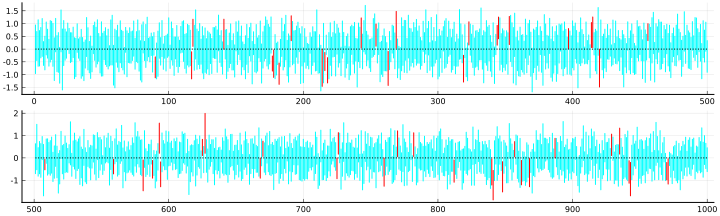

In [6]:
function plot_CIs(μ₀, α, X; indices=1:500)
    P = plot(; size=(1000, 150), legend=false)
    for i in indices
        a, b = confidence_interval(α, @view(X[:,i]))
        color = ifelse(a ≤ μ₀ ≤ b, :cyan, :red)
        plot!([i,i], [a,b], color=color)
    end
    plot!([minimum(indices), maximum(indices)], [μ₀, μ₀], color=:black, ls=:dot)
    plot!(xlim=(minimum(indices)-10, maximum(indices)+5))
end

function plot1000CIs(population_dist; n=30, α=0.05)
    L = 1000
    μ₀ = mean(population_dist)
    X = rand(population_dist, n, L)
    P1 = plot_CIs(μ₀, α, X; indices=1:500)
    P2 = plot_CIs(μ₀, α, X; indices=501:1000)
    plot(P1, P2, size=(1000, 300), layout=grid(2,1))
end

plot1000CIs(Normal(); n=10, α=0.05)

## 仮説検定や区間推定がモデルに強く依存していることの重要性

一般に仮説検定や信頼区間は使用するモデルに強く依存している. 統計学入門書の多くはこの点について明瞭に書かれていない.  

そのことが原因で, 統計学を勉強している多くの人達が仮説検定や区間推定がモデル依存であることを意識できないまま先に進んでしまい, 統計モデルを用いた統計分析に出会ったときに, その自由度の高さに戸惑うことになる.  実際には仮説検定や区間推定の段階で現実にはどこまで正しいのか不明の統計モデルを使用しているのである. 

統計モデルの自由度は極めて高いので, 分析の客観性を保つために, ベイズ統計における事前分布の使用を特別視することは不適切な考え方だということになる. 

### 全体の平均値に大きな影響を与える小集団が母集団に含まれている場合

母集団のうち95%は標準正規分布にしたがっており, 残りの5%は平均50, 分散1の正規分布に従っていると仮定する. 次のセルでその分布の確率密度函数をプロットしておく.

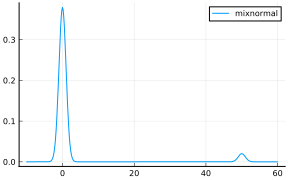

In [7]:
mixnormal = MixtureModel([Normal(), Normal(50, 1)], [0.95, 0.05])
x = range(-10, 60, length=400)
plot(x, pdf.(mixnormal, x), label="mixnormal")

このとき, その母集団のサイズ $n=30$ のサンプルに例外的な5%の小集団の要素が1つも含まれない確率は21%強にもなる. サイズ $n=30$ のサンプルだと例外的な5%の存在を完全に見逃す可能性が20%を超えている. このような可能性が疑われる場合には, 正規分布モデルに基いた信頼区間は機能しなくなる.

In [8]:
0.95^30

0.21463876394293727

以下のセルでは, 上の設定の母集団のサイズ30のサンプルを100万個生成し, その各々について95%信頼区間を計算し, 信頼区間に母集団分布の平均が含まれる割合を計算している.  95%には程遠い78%程度の割合になる.

In [9]:
@time prob_of_true_val_is_in_confint(mixnormal; n=30, α=0.05)

 10.140239 seconds (91.37 M allocations: 2.075 GiB, 7.53% gc time)


0.783596

次のセルでは, 上の母集団のサイズ30のサンプルを1000個生成して, 各々の95%信頼区間プロットしている. 赤線は母集団の平均を含まない信頼区間である.  例外の5%をサンプルが1つも含まないケースが結構多いせいで, 信頼区間が狭くなってしまって, 区間推定に完全に失敗するケースが無視できないだけ大量に発生していることがわかる.

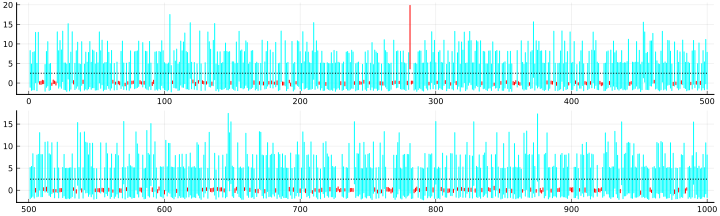

In [10]:
plot1000CIs(mixnormal; n=30, α=0.05)

以下では以上と同じことをサイズ $n=100$ のサンプルで行っている. 95%信頼区間に母集団の平均が含まれる割合は90%に届かない. そうなってしまう理由はサイズ $n=100$ のサンプルに5%の例外が1つも含まれないことはまれだが(0.6%弱), 5%の例外の含まれる確率が5%よりも小さ過ぎると, 信頼区間が小さい方に偏り過ぎてしまうことになってしまうからだ. 

要するに, この場合にはサンプルサイズを $n=100$ まで増やしても, 正規分布モデルを使った区間推定を信頼してはいけないということである.

In [11]:
0.95^100

0.005920529220333998

In [12]:
@time prob_of_true_val_is_in_confint(mixnormal; n=100, α=0.05)

 24.513172 seconds (301.00 M allocations: 6.750 GiB, 8.05% gc time)


0.892274

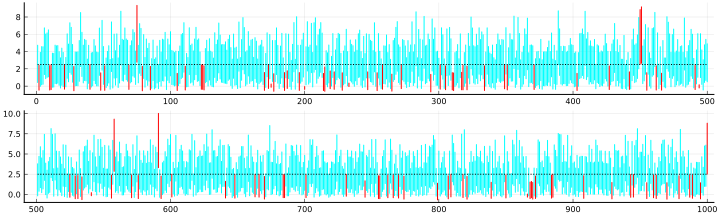

In [13]:
plot1000CIs(mixnormal; n=100, α=0.05)

### それではどうすればよいのか？

前節の計算結果を見ればわかるように, 母集団の95%が正規分布に従っていたとしても, 全体の平均に大きな影響を与える5%の小集団を母集団分布が含んでいるだけで, 正規分布モデルに基いた区間推定は破綻する.

だから, 正規分布モデルに基いた区間推定を使用する場合には, そのような状況ではないことを別の議論で示しておく必要がある.  

例えば, サンプルが何らかの測定の繰り返しによって得られたものであれば, 過去の同様の測定のデータでは全体の平均に大きな影響を与える小集団がまったく観測されていないことを理由に今回の場合にもそのように仮定してよいと主張することは十分合理的だと思われる.

このように, 正規分布モデルを使った単純な区間推定でさえ, 過去の調査や実験の結果がどうであったかに関する情報は重要な役目を果たすのである. 

結果的に母集団分布に正規分布モデルを適用することが不適切だとわかった場合には当然他のより適切なモデルを探して推定に役に立てるべきだろう.

統計学入門書ではこの点について十分な説明がないようなので, みんな注意するべきだと思う.

## 他の計算例

prob_of_true_val_is_in_confint(Uniform(); n = 30, α = 0.05) = 0.949096


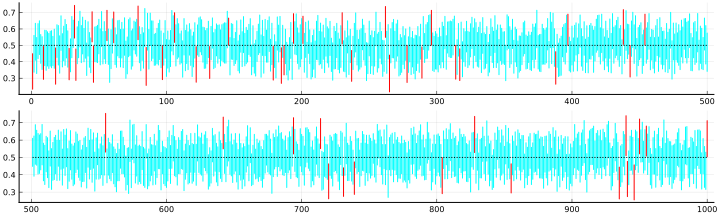

In [14]:
@show prob_of_true_val_is_in_confint(Uniform(); n=30, α=0.05)
plot1000CIs(Uniform(0, 1); n=30, α=0.05)

prob_of_true_val_is_in_confint(Gamma(10, 0.1); n = 30, α = 0.05) = 0.947749


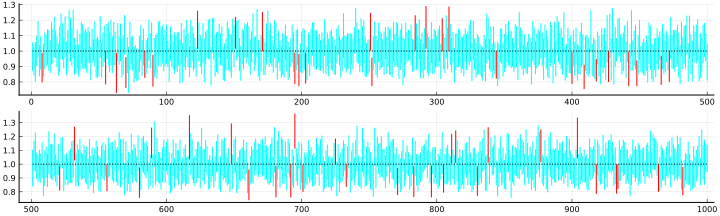

In [15]:
@show prob_of_true_val_is_in_confint(Gamma(10, 0.1); n=30, α=0.05)
plot1000CIs(Gamma(10, 0.1); n=30, α=0.05)

prob_of_true_val_is_in_confint(Exponential(); n = 30, α = 0.05) = 0.927275


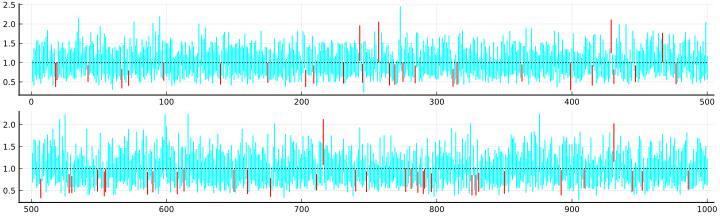

In [16]:
@show prob_of_true_val_is_in_confint(Exponential(); n=30, α=0.05)
plot1000CIs(Exponential(); n=30, α=0.05)

prob_of_true_val_is_in_confint(LogNormal(); n = 30, α = 0.05) = 0.882442


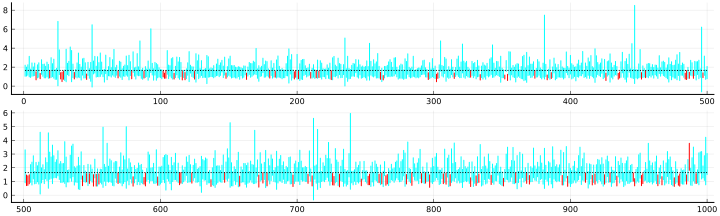

In [17]:
@show prob_of_true_val_is_in_confint(LogNormal(); n=30, α=0.05)
plot1000CIs(LogNormal(); n=30, α=0.05)

prob_of_true_val_is_in_confint(Beta(0.1, 10); n = 30, α = 0.05) = 0.813512


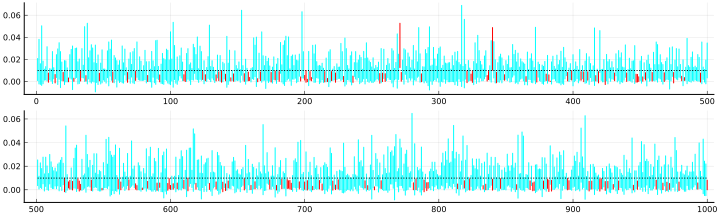

In [18]:
@show prob_of_true_val_is_in_confint(Beta(0.1, 10); n=30, α=0.05)
plot1000CIs(Beta(0.1, 10); n=30, α=0.05)